# ロジスティック回帰の利用

#### データの読み込み

In [1]:
import numpy as np
import cv2
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
iris = datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.data.shape

(150, 4)

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target.shape

(150,)

クラスが二つあることがわかる

In [6]:
np.unique(iris.target)

array([0, 1, 2])

#### バイナリ分類の問題にする

バイナリ分類問題:二つのクラスしか持たない問題\
方法:特定のクラスに属するデータ点を全て無視してしまう。

In [7]:
idx = iris.target != 2
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)

#### データの点検

Text(0, 0.5, 'sepal width (cm)')

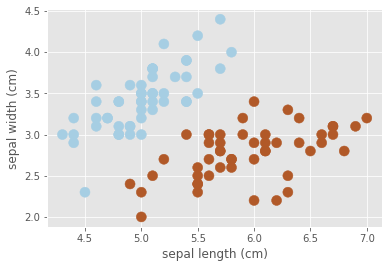

In [8]:
plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.Paired, s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data, target, test_size=0.1, random_state=42 
)

#### 学習セットと評価セットにデータを分割する

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data, target, test_size=0.1, random_state=42
)

In [11]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [12]:
X_test.shape, y_test.shape

((10, 4), (10,))

#### 分類器の学習

In [14]:
lr = cv2.ml.LogisticRegression_create()

学習方法の指定(cn2.ml.LogisticRegression_BATCH, cv2.ml, LogisticRegression_MINI_BATCH)

In [18]:
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)
lr.setMiniBatchSize(1)

終了するまでに実行する反復回数を指定する。

In [20]:
lr.setIterations(100)

オブジェクトのtrainメソッドを呼び出す。成功するとTrueを返す。

In [21]:
lr.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

重みの確認

In [23]:
lr.get_learnt_thetas()

array([[-0.04090133, -0.01910263, -0.16340333,  0.28743777,  0.11909772]],
      dtype=float32)

#### 分類器の評価

In [24]:
ret, y_pred = lr.predict(X_train)
metrics.accuracy_score(y_train, y_pred)

1.0

In [26]:
ret, y_pred = lr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0